In [ ]:
import pandas as pd

import re
import nltk
from nltk.corpus import stopwords
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,accuracy_score,precision_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
import pickle

In [ ]:
data_frame = pd.read_csv('/content/prepared_spam.csv')



In [ ]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
def preprocess_text(text):
  text = text.lower()
  text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
  words = text.split()
  words = [word for word in words if word not in stopwords.words("english")]
  return " ".join(words)


data_frame['new_Content'] = data_frame['Content'].apply(preprocess_text)
data_frame.head()


,Label,Content,new_Content
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah dont think goes usf lives around though


In [ ]:
vectorize = CountVectorizer()

In [ ]:
X = vectorize.fit_transform(data_frame['new_Content'])

In [ ]:
X

<5572x9318 sparse matrix of type '<class 'numpy.int64'>'
	with 47145 stored elements in Compressed Sparse Row format>

In [ ]:
X_df = pd.DataFrame(X.toarray(), columns=vectorize.get_feature_names_out())
X_df.head()

,008704050406,0089my,0121,01223585236,01223585334,0125698789,02,020603,0207,02070836089,...,zebra,zed,zeros,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = vectorize.fit_transform(data_frame['new_Content'])
y = data_frame['Label']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
ml = MultinomialNB()
ml.fit(X_train,y_train)


MultinomialNB()

In [ ]:
y_pred = ml.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       954
           1       0.93      0.93      0.93       161

    accuracy                           0.98      1115
   macro avg       0.96      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115



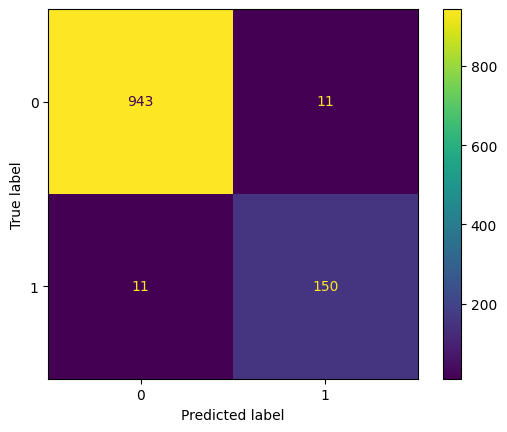

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ml_cm = confusion_matrix(y_test,y_pred)
ml_cn = ConfusionMatrixDisplay(ml_cm,display_labels=ml.classes_)
ml_cn.plot()


In [ ]:
gb = GaussianNB()
gb.fit(X_train.toarray(),y_train)

GaussianNB()

In [ ]:
y_pred2 = gb.predict(X_test.toarray())

In [ ]:
print("Accuracy of Multinomial Naive Bayes:",accuracy_score(y_test,y_pred))
print("Accuracy of Gaussian Naive Bayes:",accuracy_score(y_test,y_pred2))
print("Pressision of the Multionomial Naive Bayes:",precision_score(y_test,y_pred))
print("Pressision of the Gaussian Naive Bayes",precision_score(y_test,y_pred2))

Accuracy of Multinomial Naive Bayes: 0.9802690582959641
Accuracy of Gaussian Naive Bayes: 0.9013452914798207
Pressision of the Multionomial Naive Bayes: 0.9316770186335404
Pressision of the Gaussian Naive Bayes 0.6103896103896104


In [ ]:
params = {"alpha": [0.1, 0.5, 1.0, 5.0, 10.0]}
grid_search = GridSearchCV(MultinomialNB(), param_grid=params, cv=5)
grid_search.fit(X_train, y_train)

print("Best alpha:", grid_search.best_params_)
best_model = grid_search.best_estimator_

Best alpha: {'alpha': 5.0}


In [ ]:
best_mb = MultinomialNB(alpha = 5)
best_mb.fit(X_train,y_train)


MultinomialNB(alpha=5)

In [ ]:
y_pred_best = best_mb.predict(X_test)

In [ ]:
print("Accuracy of MultinomialNB after tunning:",accuracy_score(y_test,y_pred_best))
print("Pressisin of MultinomialNB after tunning:",precision_score(y_test,y_pred_best))

Accuracy of MultinomialNB after tunning: 0.9730941704035875
Pressisin of MultinomialNB after tunning: 0.9781021897810219


In [ ]:
pickle.dump(best_mb,open("spam_model1_updated.pkl","wb"))
pickle.dump(vectorize,open("vectorize.pkl","wb"))